# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [ ]:
import requests
import pandas as pd

# Function to get geographical data from Geoapify
def get_geographical_data(geoapify_key):
    base_url = "https://api.geoapify.com/v1/geocode/search"
    params = {
        "text": city,
        "apiKey": geoapify_key
    }
    
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
        data = response.json()
        
        # Check if the API key is invalid
        if 'error' in data:
            raise ValueError("Invalid API key. Please check your API key and try again.")
        
        return data
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except ValueError as val_err:
        print(val_err)
    except Exception as err:
        print(f"An error occurred: {err}")

# Example usage
geoapify_api_key = "your_geoapify_api_key"  # Replace with your actual Geoapify API key
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix"]  # Example list of cities

# Retrieve data for each city and store in a list
geo_data = []
for city in cities:
    data = get_geographical_data(city, geoapify_api_key)
    if data:
        geo_data.append(data)

# Convert the list of dictionaries to a Pandas DataFrame
geo_data_df = pd.DataFrame(geo_data)

# Display sample data
print(geo_data_df.head())


In [ ]:
import pandas as pd
import folium

# Load the CSV file into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Define the ideal weather conditions
min_temp = 20.0
max_temp = 25.0
min_humidity = 30
max_humidity = 70
max_cloudiness = 20

# Filter the DataFrame 
ideal_conditions_df = city_data_df[
    (city_data_df['Max Temp'] >= min_temp) & 
    (city_data_df['Max Temp'] <= max_temp) & 
    (city_data_df['Humidity'] >= min_humidity) & 
    (city_data_df['Humidity'] <= max_humidity) & 
    (city_data_df['Cloudiness'] <= max_cloudiness)
].dropna()

# Create a map centered around the average coordinates of the filtered cities
center_lat = ideal_conditions_df['Lat'].mean()
center_lng = ideal_conditions_df['Lng'].mean()
m = folium.Map(location=[center_lat, center_lng], zoom_start=2)

# Function to add points to the map
def add_point(row):
    folium.Marker(
        location=[row['Lat'], row['Lng']],
        popup=f"City: {row['City']}, Max Temp: {row['Max Temp']}°C, Humidity: {row['Humidity']}%",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Apply the function to each row in the DataFrame
ideal_conditions_df.apply(add_point, axis=1)

# Save the map as an HTML file
#m.save("output_data/ideal_weather_conditions_map.html")

# Display the map
#m
# Display sample data
print(geo_data_df.head())

In [ ]:
import requests
import pandas as pd

# Function to get geographical data from Geoapify
def get_geographical_data(city, api_key):
    base_url = "https://api.geoapify.com/v1/geocode/search"
    params = {
        "text": city,
        "apiKey": geoapify_key
    }
    
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raise an HTTPError for bad responses (4xx and 5xx)
        data = response.json()
        
        # Check if the API key is invalid
        if 'error' in data:
            raise ValueError("Invalid API key. Please check your API key and try again.")
        
        return data
    # Break
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except ValueError as val_err:
        print(val_err)
    except Exception as err:
        print(f"An error occurred: {err}")

# Example usage
geoapify_api_key = "ggeoapify_key" 

# Retrieve data for each city and store in a list
geo_data = []
for city in cities:
    data = get_geographical_data(city, geoapify_api_key)
    if data:
        geo_data.append(data)

# Convert the list of dictionaries to a Pandas DataFrame
geo_data_df = pd.DataFrame(geo_data)

# Display sample data
print(geo_data_df.head())

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
1,1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
2,2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
3,3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

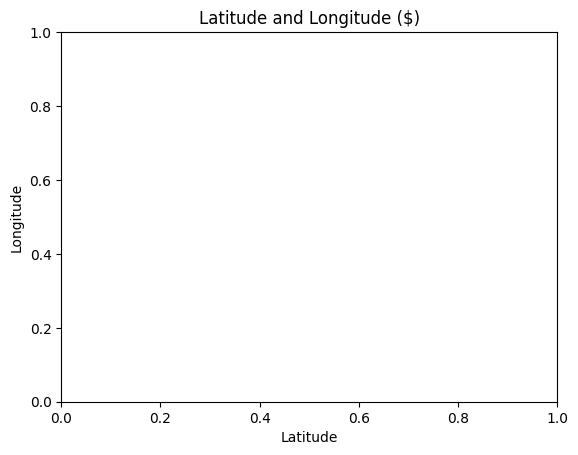

In [77]:
import pandas as pd
import folium

# Load the CSV file into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Example city data with coordinates (replace with your actual data)
cities = {
    "Cities": ["Saint-Pierre", "badger", "Ust-kulom", "Emerald", "Newman", "Fort Bragg", "Laguna", "Nova Vicosa", "Fort Myers Shores"
    "Trinity Beach", "Racine", "Six-Fours-Les-Plages", "Porto Velho", "Posto Fiscal Rolim de Moura", "Port Douglas", "Roswell", "Hell-ville", "Sona",
    "Morehead City", "Vernal"],
    "Latitude": [-21.3393, 64.8, 61.6864, -23.5333, 37.3138, 35.139, 38.421, -17.8919, 26.7092, -16.7888, 42.7495, 43.0938, -8.7619, -13.0833, -16.4833, 34.0232, -13.4 ,45.4388, 34.7229 ,40.4555],
    "Longitude": [55.4781, -147.5333, 53.6902, 148.1667, -121.0208, -79.006, -121.4238, -39.3719, -81.7459, 145.6968, -88.0751, 5.84, -63.9039, -62.2667, 145.4667, -84.3616, 48.2667, 10.8255, -76.726, -109.5287],
    "Humidity": [61, 37, 43, 28, 51, 80, 52, 87, 95, 44, 83, 65, 88, 65, 58, 72, 78, 73, 73, 32]
}


# Load sample data (replace with your own dataset)
#tips = sns.load_dataset("tips")

# Customize axis labels
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Latitude and Longitude ($)")

# Show the plot
plt.show()


# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2)

# Function to add points to the map
def add_point(city_data):
    location = [city_data['Latitude'], city_data['Longitude']]
    humidity = city_data['Humidity']
    city_name = city_data['Cities']
    
    folium.CircleMarker(
        location=location,
        radius=humidity / 10,  # Adjust radius for better visualization
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"City: {"Saint-Pierre"}, Humidity: {humidity}%"
    ).add_to(m)

# Apply the function to each row in the DataFrame
for index, row in city_data_df.iterrows():
    add_point(row)

# Add a legend
legend_html = """
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 150px; height: auto; 
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color: white;">
    <p style="text-align: center;"><strong>Legend</strong></p>
    <p><i style="color: blue;">●</i> Humidity (size of circle)</p></div>  
    <p><i style="color: red;">●</i> Saint-Pierre (size of circle)</p></div> 
    <p><i style="color: green;">●</i> badger (size of circle)</p></div>
    <p><i style="color: orange;">●</i> Ust-kulom (size of circle)</p></div>
    <p><i style="color: indigo;">●</i> Emerald (size of circle)</p></div>
    <p><i style="color: purple;">●</i> Newman (size of circle)</p></div>
    <p><i style="color: grey;">●</i> Fort Bragg (size of circle)</p></div>
    <p><i style="color: pink;">●</i> Laguna (size of circle)</p></div>
    <p><i style="color: tan;">●</i> Nova Vicosa (size of circle)</p></div>
    <p><i style="color: navy blue;">●</i> Fort Myers Shores (size of circle)</p></div>
    <p><i style="color: ash;">●</i> Trinity Beach (size of circle)</p></div>
    <p><i style="color: maroon;">●</i> Racine (size of circle)</p></div>
    <p><i style="color: teal;">●</i> Six-Fours-Les-Plages (size of circle)</p></div>
    <p><i style="color: brown;">●</i> Porto Velho (size of circle)</p></div>
    <p><i style="color: gold;">●</i> Posto Fiscal Rolim de Moura (size of circle)</p></div>
    <p><i style="color: olive;">●</i> Port Douglas (size of circle)</p></div>
    <p><i style="color: lime;">●</i> Roswell (size of circle)</p></div>
    <p><i style="color: cyan;">●</i> Hell-ville (size of circle)</p></div>
    <p><i style="color: magenta;">●</i> Sona (size of circle)</p></div>
    <p><i style="color: Biege;">●</i> Morehead City (size of circle)</p></div>
    <p><i style="color: apricot;">●</i> Vernal (size of circle)</p></div>   
"""
m.get_root().html.add_child(folium.Element(legend_html))
  

# Save the map as an HTML file
m.save('humidity_map.html')

# Display the map in Jupyter Notebook (if using Jupyter)
m


In [7]:
import pandas as pd
import folium

# Load the CSV file into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Create a base map
m = folium.Map(location=[20,0], zoom_start=2)

# Function to add points to the map
def add_point(city_data):
    location = [city_data['Latitude'], city_data['Longitude']]
    humidity = city_data['Humidity']
    city_name = city_data['City']
    folium.CircleMarker(
        location=location,
        radius=humidity / 10,  # Adjust radius for better visualization
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"City: {city_name}, Humidity: {humidity}%"
    ).add_to(m)

# Apply the function to each row in the DataFrame
city_data_df.apply(add_point, axis=1)

# Save the map as an HTML file
m.save('humidity_map.html')

# Display the map in Jupyter Notebook (if using Jupyter)
m


In [3]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity)

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

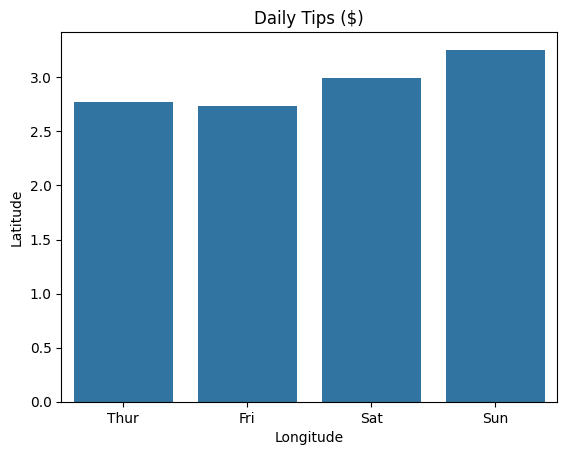

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load sample data (replace with your own dataset)
tips = sns.load_dataset("tips")

# Create the bar plot
sns.barplot(data=tips, x="day", y="tip", estimator="mean", errorbar=None)

# Customize axis labels
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Daily Tips ($)")

# Show the plot
plt.show()

# Apply the function to each row in the DataFrame
city_data_df.apply(add_point, axis=1)

# Save the map as an HTML file
m.save('humidity_map.html')

# Display the map in Jupyter Notebook (if using Jupyter)
m


In [48]:
import pandas as pd
import folium

# Load the CSV file into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Create a base map
m = folium.Map(location=[20, 0], zoom_start=2)

# Function to add points to the map
def add_point(city_data):
    location = [city_data['Latitude'], city_data['Longitude']]
    humidity = city_data['Humidity']
    city_name = city_data['City']
    
    folium.CircleMarker(
        location=location,
        radius=humidity / 10,  # Adjust radius for better visualization
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"City: {city_name}, Humidity: {humidity}%"
    ).add_to(m)

# Apply the function to each row in the DataFrame
for index, row in city_data_df.iterrows():
    add_point(row)

# Add a legend
legend_html = """
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 150px; height: auto; 
                border:2px solid grey; z-index:9999; font-size:14px;
                background-color: white;">
    <p style="text-align: center;"><strong>Legend</strong></p>
    <p><i style="color: blue;">●</i> Humidity (size of circle)</p>
    </div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Save the map as an HTML file
m.save('humidity_map.html')

# Display the map in Jupyter Notebook (if using Jupyter)
m

In [47]:
import pandas as pd
import folium

# Load the CSV file into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Create a base map
m = folium.Map(location=[20,0], zoom_start=2)

# Function to add points to the map
def add_point(city_data):
    location = [city_data['Latitude'], city_data['Longitude']]
    max_temp = city_data['Max_temp']
    humidity = city_data['Humidity']
    cloudiness = city_data['Cloudiness']
    wind_speed = city_data['Wind_speed']

    city_name = city_data['City']
    folium.CircleMarker(
        location=saint-pierre,
        radius=humidity / 10,  # Adjust radius for better visualization
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"City: {saint-pierre}, Humidity: {Humidity}"
        
    ).add_to(m)

# Apply the function to each row in the DataFrame


# Save the map as an HTML file
m.save('humidity_map.html')

# Display the map in Jupyter Notebook (if using Jupyter)
m


In [26]:
import pandas as pd
import folium

# Load the CSV file into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Define the ideal weather conditions
min_temp = 20.0
max_temp = 25.0
min_humidity = 30
max_humidity = 70
max_cloudiness = 20

# Filter the DataFrame based on the ideal conditions and drop rows with null values
ideal_conditions_df = city_data_df[
    (city_data_df['Max_Temp'] >= min_temperature) & 
    (city_data_df['Min_Temp'] <= max_temperature) & 
    (city_data_df['Humidity'] >= min_humidity) & 
    (city_data_df['Humidity'] <= max_humidity) & 
    (city_data_df['Cloudiness'] <= cloudiness)
].dropna()

# Create a map centered around the average latitude and longitude
map_center = [ideal_conditions_df['Lat'].mean(), ideal_conditions_df['Long'].mean()]
city_map = folium.Map(location=map_center, zoom_start=2)

#Assuming Temp is Temperature instead
# Add points to the map
for index, row in ideal_conditions_df.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Lng']],
        radius=row['Humidity'] / 10,  # Scale the radius by humidity
        popup=f"City: {row['City']}\nHumidity: {row['Humidity']}%",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(city_map)

# Save the map to an HTML file
city_map.save("output_data/city_weather_map.html")

# Display the map
city_map


KeyError: 'Max_Temp'

In [9]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Define the ideal weather conditions
min_temp = 20.0
max_temp = 25.0
min_humidity = 30
max_humidity = 70
max_cloudiness = 20

# Filter the DataFrame based on the ideal conditions
ideal_conditions_df = city_data_df[
    (city_data_df['Max Temp'] >= min_temp) & 
    (city_data_df['Max Temp'] <= max_temp) & 
    (city_data_df['Humidity'] >= min_humidity) & 
    (city_data_df['Humidity'] <= max_humidity) & 
    (city_data_df['Cloudiness'] <= max_cloudiness)
]

# Display the filtered DataFrame
print(ideal_conditions_df)


KeyError: 'Max Temp'

In [4]:
# Narrow down cities that fit criteria and drop any results with null values
# YOUR CODE HERE

# Drop any rows with null values
# YOUR CODE HERE

# Display sample data
# YOUR CODE HERE

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
43,43,saint-pierre,-21.3393,55.4781,25.10,61,0,3.09,RE,1718607814
66,66,badger,64.8000,-147.5333,23.95,37,0,2.57,US,1718607841
102,102,ust'-kulom,61.6864,53.6902,21.21,43,0,3.85,RU,1718607882
120,120,emerald,-23.5333,148.1667,22.41,28,0,2.43,AU,1718607904
130,130,newman,37.3138,-121.0208,21.13,51,0,1.79,US,1718607916
138,138,fort bragg,35.1390,-79.0060,22.32,80,0,0.00,US,1718607716
146,146,laguna,38.4210,-121.4238,23.16,52,0,2.06,US,1718607935
160,160,nova vicosa,-17.8919,-39.3719,21.66,87,0,1.27,BR,1718607707
170,170,fort myers shores,26.7092,-81.7459,26.67,95,0,3.09,US,1718607962
176,176,trinity beach,-16.7888,145.6968,26.67,44,0,3.60,AU,1718607970


### Step 3: Create a new DataFrame called `hotel_df`.

In [5]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# YOUR CODE HERE

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
# YOUR CODE HERE

# Display sample data
# YOUR CODE HERE

,City,Country,Lat,Lng,Humidity,Hotel Name
43,saint-pierre,RE,-21.3393,55.4781,61,
66,badger,US,64.8000,-147.5333,37,
102,ust'-kulom,RU,61.6864,53.6902,43,
120,emerald,AU,-23.5333,148.1667,28,
130,newman,US,37.3138,-121.0208,51,
138,fort bragg,US,35.1390,-79.0060,80,
146,laguna,US,38.4210,-121.4238,52,
160,nova vicosa,BR,-17.8919,-39.3719,87,
170,fort myers shores,US,26.7092,-81.7459,95,
176,trinity beach,AU,-16.7888,145.6968,44,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [6]:
# Set parameters to search for a hotel
radius = # YOUR CODE HERE
params = {
    # YOUR CODE HERE
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    # YOUR CODE HERE

    # Add the current city's latitude and longitude to the params dictionary
    params["filter"] = # YOUR CODE HERE
    params["bias"] = # YOUR CODE HERE

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionary
    name_address = # YOUR CODE HERE

    # Convert the API response to JSON format
    name_address = # YOUR CODE HERE

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
saint-pierre - nearest hotel: Tropic Hotel
badger - nearest hotel: Clarion Hotel & Suites
ust'-kulom - nearest hotel: No hotel found
emerald - nearest hotel: Emerald Central Hotel
newman - nearest hotel: No hotel found
fort bragg - nearest hotel: Airborne Inn Lodging
laguna - nearest hotel: Holiday Inn Express & Suites
nova vicosa - nearest hotel: Pousada Pontal da Barra
fort myers shores - nearest hotel: Comfort Inn Fort Myers
trinity beach - nearest hotel: Blue Lagoon Resort
racine - nearest hotel: No hotel found
six-fours-les-plages - nearest hotel: Kyriad Direct La Seyne-sur-Mer
porto velho - nearest hotel: Hotel Slaviero Essential Porto Velho
posto fiscal rolim de moura - nearest hotel: No hotel found
port douglas - nearest hotel: Mantra Aqueous Port Douglas
roswell - nearest hotel: Best Western Plus Hotel
hell-ville - nearest hotel: ABUD HOTEL
sona - nearest hotel: Al Bosco
morehead city - nearest hotel: Bask Hotel Big Rock Landing, Trademark Collection by W

,City,Country,Lat,Lng,Humidity,Hotel Name
43,saint-pierre,RE,-21.3393,55.4781,61,Tropic Hotel
66,badger,US,64.8000,-147.5333,37,Clarion Hotel & Suites
102,ust'-kulom,RU,61.6864,53.6902,43,No hotel found
120,emerald,AU,-23.5333,148.1667,28,Emerald Central Hotel
130,newman,US,37.3138,-121.0208,51,No hotel found
138,fort bragg,US,35.1390,-79.0060,80,Airborne Inn Lodging
146,laguna,US,38.4210,-121.4238,52,Holiday Inn Express & Suites
160,nova vicosa,BR,-17.8919,-39.3719,87,Pousada Pontal da Barra
170,fort myers shores,US,26.7092,-81.7459,95,Comfort Inn Fort Myers
176,trinity beach,AU,-16.7888,145.6968,44,Blue Lagoon Resort


### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [7]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)